In [21]:
%matplotlib inline
import seaborn as sns

In [32]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
import pandas as pd
from sklearn.datasets import load_boston

#  数据准备

首先我们可以使用pandas将数据文件读取，数据类型为DataFrame。

In [36]:
boston = load_boston()
df_boston = pd.DataFrame(boston.data,columns=boston.feature_names)
df_boston["MEDV"] = boston.target
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#  散点图

散点图能够同时将两个数值型特征可视化，从散点图中我们可以直观地观察两个特征之间的关系。例如是否存在线性关系等。 seaborn中可以使用 jointplot 函数绘制散点图。jointplot函数通常由三个参数需要设置，x和y分别代表需要横轴和纵轴显示的特征名称。data为数据，可以为DataFrame类型。例如在房价数据中，我们需要绘制犯罪率(CRIM)与房价(MEDV)之间的散点图，可以使用以下代码：

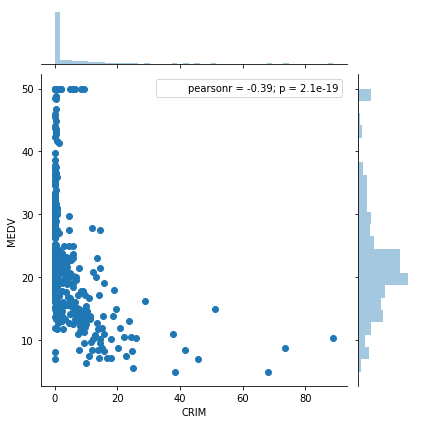

In [38]:
sns.jointplot(x = df_boston['CRIM'],y = df_boston.MEDV,data = df_boston)

从上图可以发现，我们不仅得到了两个特征的散点图，对于每一个单独的特征，jointplot函数默认将其直方图进行了绘制。同时，也将特征之间的皮尔逊相关系数计算出来。皮尔逊相关系数能够用来判断特征之间的线性关系，其取值范围为[-1,1]。取值为0表示两个特征没有相关性。越接近1说明特征之间越存在正相关性。越接近-1表示特征之间越存在负的线性相关性。在我们的上述例子中，皮尔逊相关系数为-0.39,说明犯罪率与房价之间存在一定的负相关性。

我们可以进一步使用 lmplot 方法将两个特征之间的线性回归直线也画出来。 

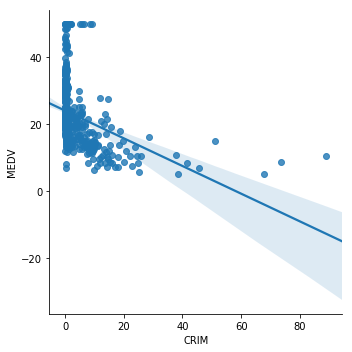

In [42]:
sns.lmplot(x='CRIM',y='MEDV',data = df_boston)

#  直方图

对于连续型特征，我们可以使用直方图来观察特征取值的分布情况。在seaborn中，直方图可以使用 distplot 函数进行绘制。例如，我们绘制出单位财产税(TAX)特征的直方图。

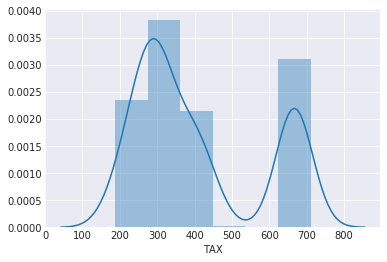

In [61]:
sns.distplot(df_boston['TAX'])

distplot 函数默认同时绘制直方图和KDE(核密度图),如果不需要核密度图，可以将kde参数设置成False。

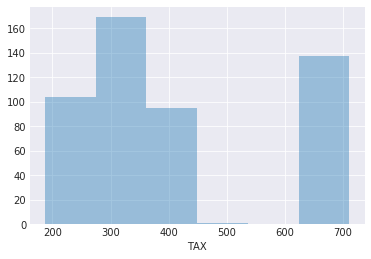

In [53]:
sns.distplot(df_boston['TAX'],kde=False)

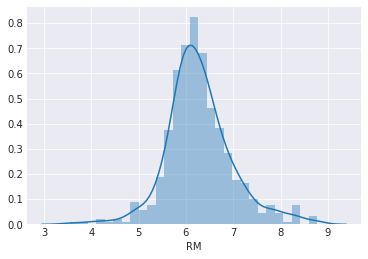

In [72]:
#同样，我们可以绘制房间数的直方图。
import matplotlib.pyplot as plt
sns.distplot(df_boston['RM'],label='data')
# plt.xlabel('data')
# plt.show()

# note
```
f, ax=plt.subplots(figsize=(12,20))

#orient='h'表示是水平展示的，alpha表示颜色的深浅程度
sns.barplot(y=group_df.sub_area.values, x=group_df.price_doc.values,orient='h', alpha=0.8, color='red')

#设置y轴、X轴的坐标名字与字体大小
plt.ylabel('price_doc', fontsize=16)
plt.xlabel('sub_area', fontsize=16)

#设置X轴的各列下标字体是水平的
plt.xticks(rotation='horizontal')

#设置Y轴下标的字体大小
plt.yticks(fontsize=15)
plt.show()

注：如果orient='v'表示成竖直显示的话，一定要记得y=group_df.sub_area.values, x=group_df.price_doc.values调换一下坐标轴，否则报错
```

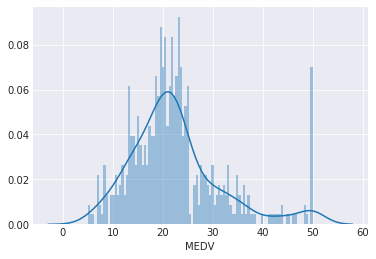

In [71]:
# 可见，房间数近似服从正态分布。我们可以通过bins参数设置分段数量，例如我们观察房价(MEDV)特征，将bins设置成100。
sns.distplot(df_boston["MEDV"],bins=100)

#  盒图

盒图可以直观地将连续型特征的中位数、上下四分位数显示出来。通常也作为一种单特征离群值检测的定性方法。在seaborn中，可以使用 boxplot 函数绘制盒图。参数orient设置盒图的朝向。

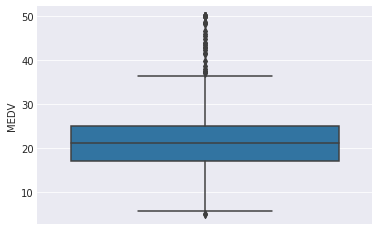

In [75]:
sns.boxplot(df_boston["MEDV"],orient='v')

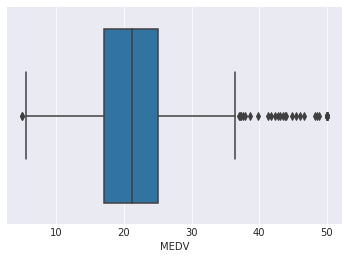

In [74]:
sns.boxplot(df_boston["MEDV"],orient='h')

```
我们可以先对数据进行分组，然后对比不同组数据的分布（盒图表示）。我们只需要给 boxplot 函数制定x和y两个参数。其中，x为分组特征，需要为离散型。y为对比的特征。例如我们查看不同的房间数下，房价的分布情况，可以使用以下代码：
```

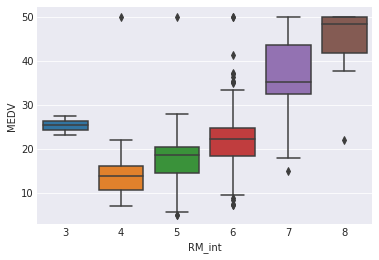

In [78]:
import math
df_boston['RM_int'] = df_boston['RM'].map(math.floor) #取整
sns.boxplot(x="RM_int",y=df_boston['MEDV'],data=df_boston,orient='v')

```
通过上图可以看出，随着房间数目的增大，房价呈现先下降后上升的变化趋势。

进一步地，我们可以通过hue参数制定第二个分组特征。例如我们希望进一步观察房子是否在河边(CHAS)对房价的影响。
```

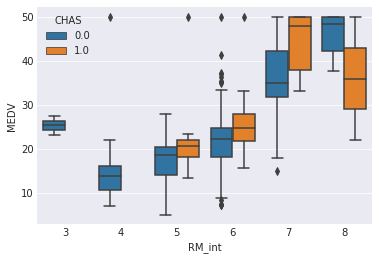

In [79]:
sns.boxplot(x="RM_int",y="MEDV",hue="CHAS",data=df_boston,orient="v")

```
通过上述盒图，我们可以得出两个基本观察结论。首先，房间数小于5的房子都不在河边。其次，在房间数量相同的情况下，河边的房子比非河边的房子价格要高。以上两点与我们日常生活经验也是相符合的。
```

# 柱状图

对于离散型特征，我们可以使用柱状图绘制其每一种取值的样本数量。例如，对于房间数（RM_int），可以通过seaborn的 countplot 函数画出不同房间数量的房子的数量。


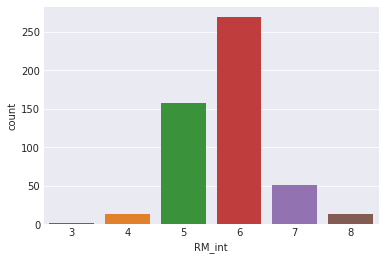

In [80]:
sns.countplot(x="RM_int",data=df_boston)

同样地，我们可以进一步制定一个分组特征绘制不同分组下的柱状图。 

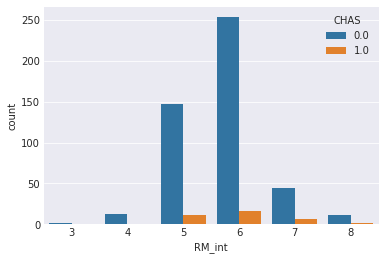

In [82]:
sns.countplot(x="RM_int",hue="CHAS",data=df_boston)

# 核密度图

与直方图类似，核密度图也是一种研究特征分布的工具。在seaborn中，通过 kdeplot 函数绘制核密度图。

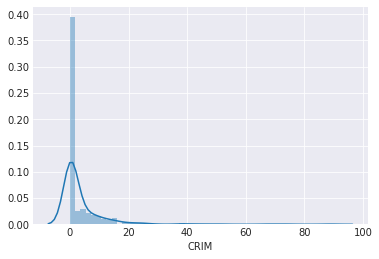

In [86]:
sns.distplot(df_boston["CRIM"])

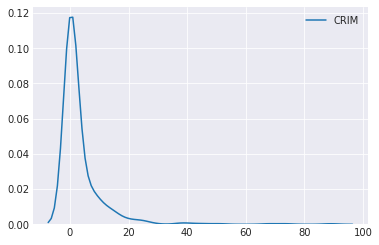

In [85]:
sns.kdeplot(df_boston["CRIM"])

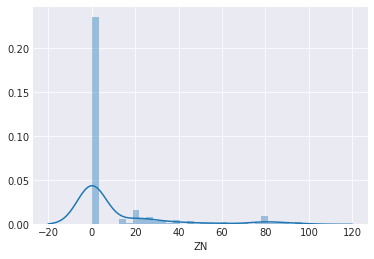

In [90]:
sns.distplot(df_boston["ZN"])

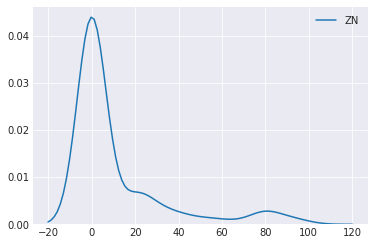

In [91]:
sns.kdeplot(df_boston["ZN"])

我们可以绘制两个特征的核密度图。例如，绘制一氧化碳和低收入人群占比两个特征的核密度图。 

In [92]:
df_boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'RM_int'],
      dtype='object')

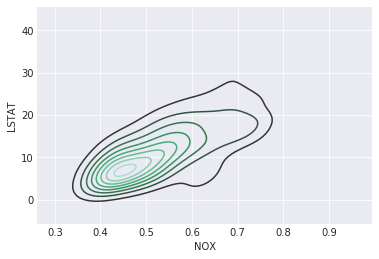

In [93]:
sns.kdeplot(df_boston["NOX"],df_boston["LSTAT"])

# 小提琴图

核密度图是一种结合了盒图和核密度图的图。它将盒图和密度图展示在同一个图上，因长相通常类似小提琴而得名。在seaborn中，可以使用 violinplot 函数绘制小提琴图。

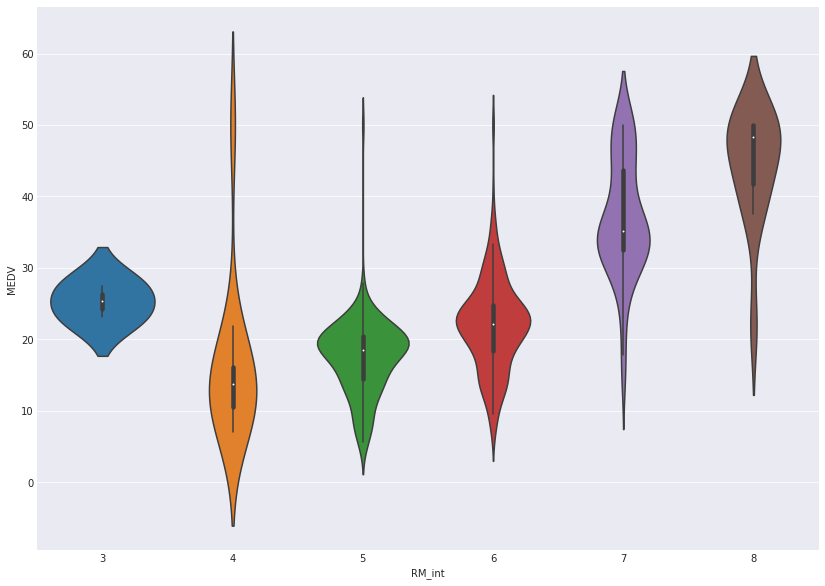

In [100]:
plt.figure(figsize=(14,10))
sns.violinplot(x="RM_int",y="MEDV",data=df_boston)

In [95]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,RM_int
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,6
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,6
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,7


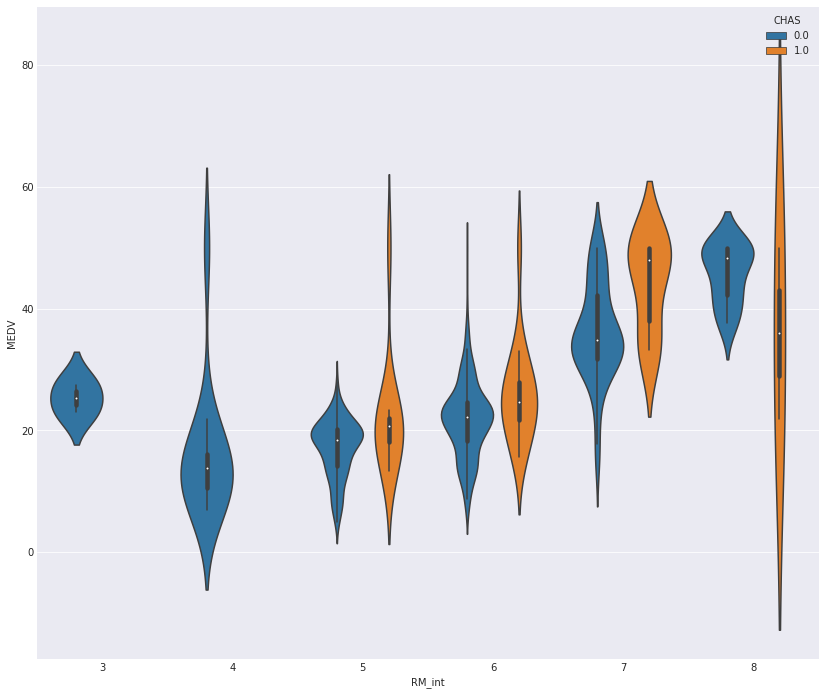

In [101]:
#与盒图类似，我们可以在小提琴图中制定额外的分组特征。
plt.figure(figsize=(14, 12))
sns.violinplot(x="RM_int",y="MEDV",hue="CHAS",data=df_boston,orient='v')

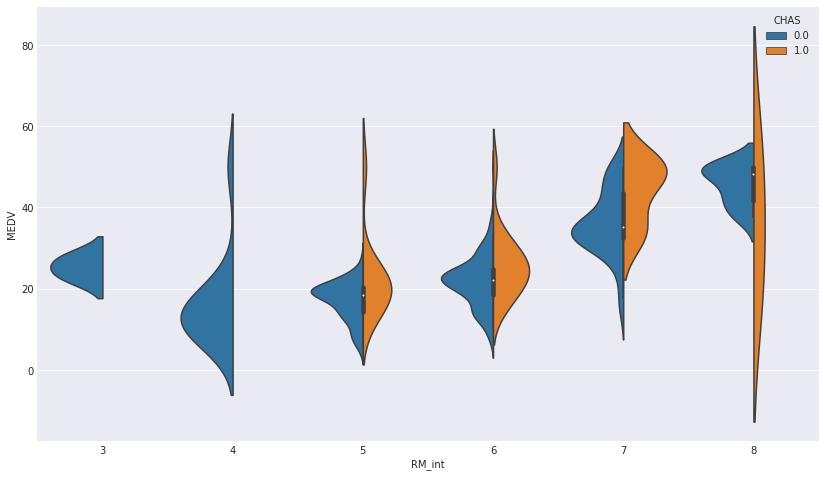

In [105]:
#将上图的分组分别绘制在盒图的两边， 使用split=True参数设置。
plt.figure(figsize=(14,8))
sns.violinplot(x="RM_int",y="MEDV",hue="CHAS",split=True,data=df_boston)

# 点对图

点对图可以同时将多个特征两两之间的散点图等通过一条命令进行绘制。点对图的绘制函数为 pairplot。为了显示美观，我们只选取数据找那个特征的一个子集进行绘制。

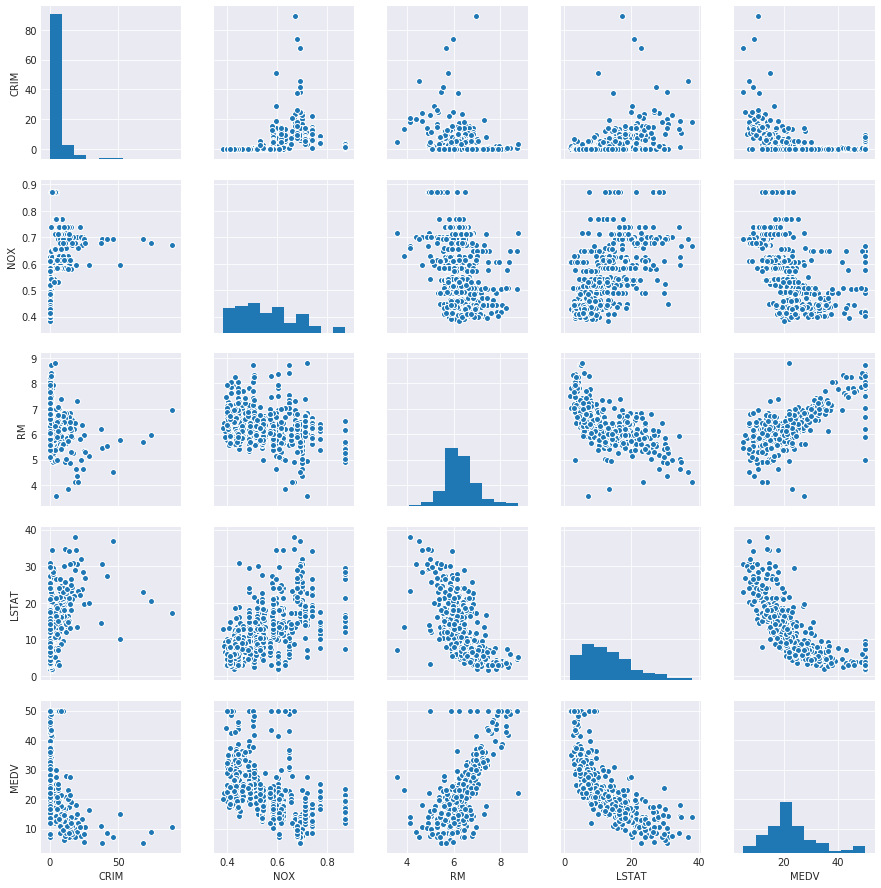

In [109]:
sns.pairplot(df_boston[["CRIM","NOX","RM","LSTAT","MEDV"]])

# 热力图

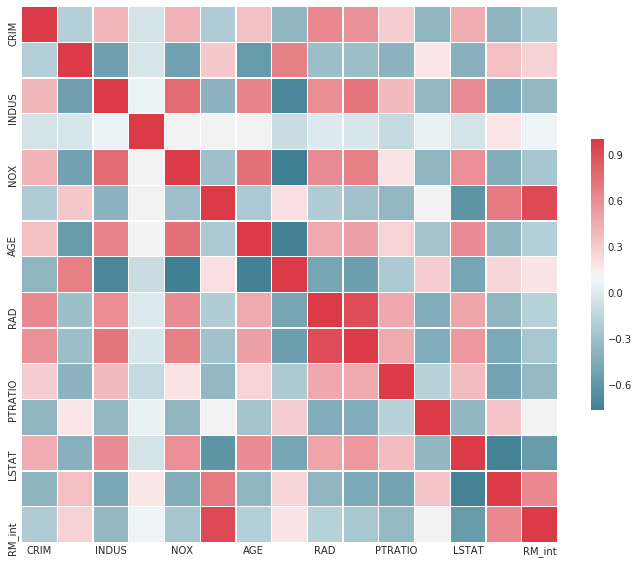

In [110]:
import matplotlib.pyplot as plt
corr = df_boston.corr() #计算特征的相关系数矩阵
f,ax = plt.subplots(figsize=(12,10))
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,cmap=cmap,vmax=1.0,square=True,xticklabels=2,
            yticklabels=2,linewidths=0.3,cbar_kws={"shrink":0.5},ax=ax)
plt.show()